In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('AI ML Internship Training Data.csv')
df.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


In [5]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Print the result
print(missing_values)

# Check for any missing values in the entire DataFrame
any_missing = df.isnull().values.any()

# Print the result
print(any_missing)

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64
True


In [6]:
df_cleaned = df.dropna(subset=['Vehicle Type'])

In [7]:
# Drop the 'Shipment ID' column
df_cleaned = df_cleaned.drop(columns=['Shipment ID'])

In [8]:
# Verify that the missing values are removed
print("Missing values in Vehicle Type:", df_cleaned['Vehicle Type'].isnull().sum())

Missing values in Vehicle Type: 0


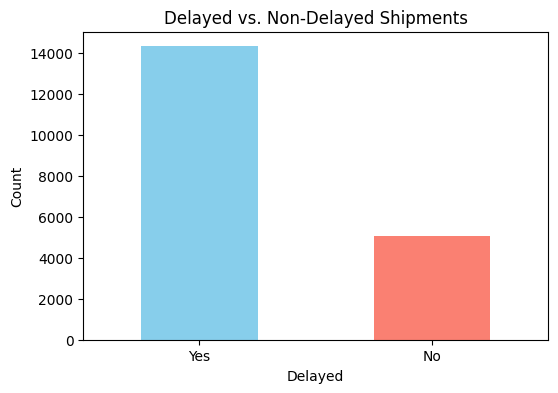

In [9]:
# Exploratory Data Analysis (EDA)
# 1. Distribution of Delayed vs. Non-Delayed Shipments
plt.figure(figsize=(6, 4))
df_cleaned['Delayed'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], rot=0)
plt.title('Delayed vs. Non-Delayed Shipments')
plt.xlabel('Delayed')
plt.ylabel('Count')
plt.show()


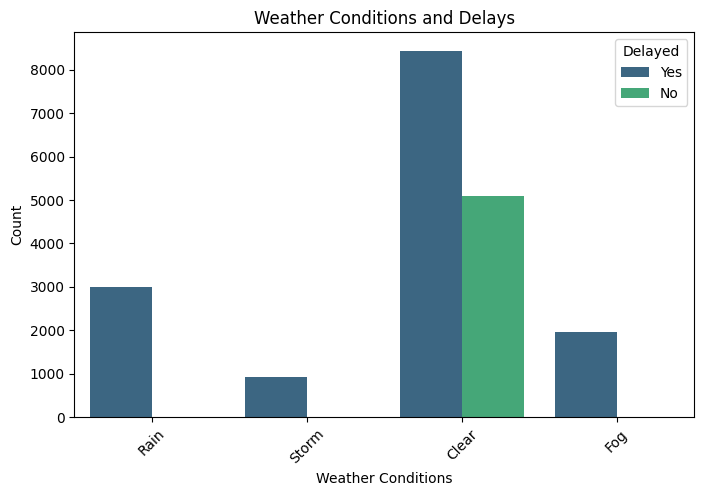

In [10]:
# 2. Impact of Weather Conditions on Delays
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Weather Conditions', hue='Delayed', palette='viridis')
plt.title('Weather Conditions and Delays')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

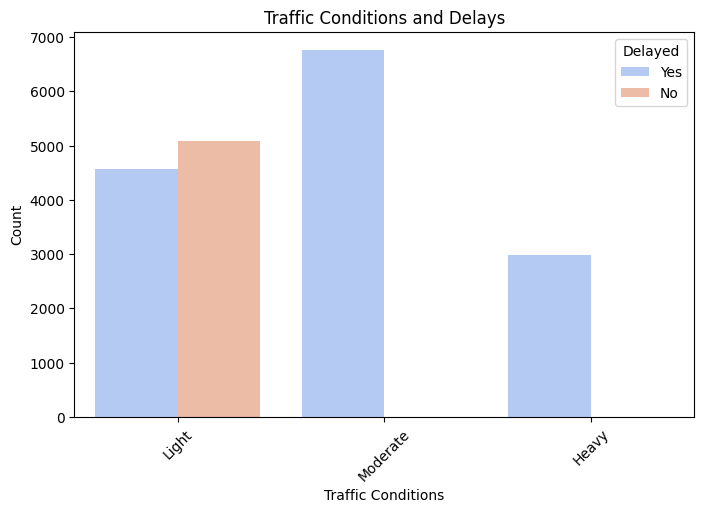

In [11]:
# 3. Impact of Traffic Conditions on Delays
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Traffic Conditions', hue='Delayed', palette='coolwarm')
plt.title('Traffic Conditions and Delays')
plt.xlabel('Traffic Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-29666760a25d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Delayed', y='Distance (km)', palette='Set2')


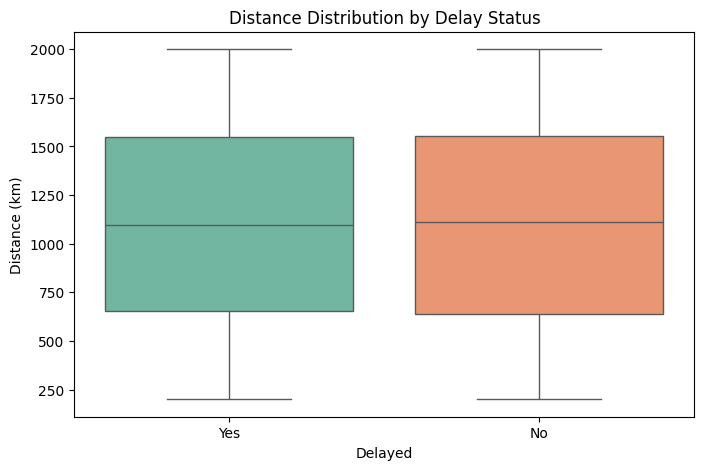

In [12]:
# 4. Distance Distribution for Delayed vs. Non-Delayed
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='Delayed', y='Distance (km)', palette='Set2')
plt.title('Distance Distribution by Delay Status')
plt.xlabel('Delayed')
plt.ylabel('Distance (km)')
plt.show()

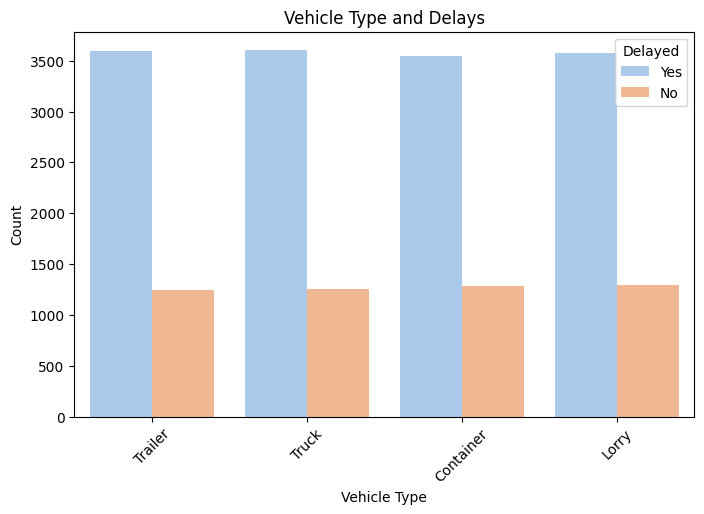

In [13]:
# 5. Vehicle Type and Delays
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Vehicle Type', hue='Delayed', palette='pastel')
plt.title('Vehicle Type and Delays')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Feature Engineering
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions'], drop_first=True)

# Convert target variable 'Delayed' to binary (Yes -> 1, No -> 0)
df_encoded['Delayed'] = df_encoded['Delayed'].map({'Yes': 1, 'No': 0})

# Save the processed dataset
df_encoded.to_csv('processed_freight_delivery_data.csv', index=False)
print("Processed dataset saved as 'processed_freight_delivery_data.csv'")

Processed dataset saved as 'processed_freight_delivery_data.csv'
